In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the JSON file
file_path = "Verifast_assignment_raw_data.json"

with open(file_path, "r") as file:
    data = json.load(file)


In [3]:
# Convert JSON data into a structured DataFrame
df = pd.json_normalize(data)
df.head()

,event,properties.time,properties.payload.context.href,properties.payload.data.productVariant.product.title,properties.payload.data.productVariant.product.url,properties.customer_id,properties.payload.data.product.title,properties.payload.data.product.url,properties.url,properties.payload.data.checkout.product,properties.payload.inputValue,properties.payload.data.searchResult.query
0,product_viewed,1735617716,https://client_name/collections/psoriasis-skin...,Restorative Shampoo for Anti Dandruff Treatment,/products/restorative-shampoo-for-sensitive-scalp,9dc992e7-619f-42b2-8847-2661f18171c5,NaN,NaN,NaN,NaN,NaN,NaN
1,product_viewed,1735618294,https://client_name/collections/psoriasis-skin...,Restorative Shampoo for Anti Dandruff Treatment,/products/restorative-shampoo-for-sensitive-scalp,0b307d43-5d30-4ff2-8aa8-98a8e50c921d,NaN,NaN,NaN,NaN,NaN,NaN
2,product_viewed,1735626746,https://client_name/collections/psoriasis-skin...,Small Patches - Eczema and Psoriasis Care Bundle,/products/small-patches-eczema-and-psoriasis-c...,d37578dd-7de0-4870-b128-3cce8fc9ac5e,NaN,NaN,NaN,NaN,NaN,NaN
3,product_viewed,1735635062,https://client_name/collections/psoriasis-skin...,"Ultra Healing Cream (for Dry/ Cracked skin, Ps...",/products/ultra-healing-foot-cream-40gm,816e25d5-fbbe-4c01-823a-b57007d29241,NaN,NaN,NaN,NaN,NaN,NaN
4,product_viewed,1735635872,https://client_name/products/skin-softening-af...,"Skin Softening Body Oil (for Dry Skin, Eczema ...",/products/skin-softening-after-shower-body-oil...,a21aba27-0a9f-43df-9148-d9dac3af4741,NaN,NaN,NaN,NaN,NaN,NaN


- ‘event’:  It is the type of event that a visitor perform
- “time”:  Time for the event
- “customer_id”:  It is the unique identifier of the visitor
- “href”:  Where did the visitor come from
- “url”:  Current page url (it has been modified to anonymize data)
- “title”:  Current page title (it has been modified to anonymize data)

In [4]:
# Convert timestamp to datetime format
df["properties.time"] = pd.to_datetime(df["properties.time"], unit="s")

# Extract utm_source from href
df["utm_source"] = df["properties.payload.context.href"].str.extract(r'utm_source=([^&]*)')

# Standardize column names
df.rename(columns={
    "event": "event_type",
    "properties.time": "timestamp",
    "properties.customer_id": "customer_id",
    "properties.payload.context.href": "page_url",
    "properties.payload.data.productVariant.product.title": "product_title",
    "properties.payload.data.productVariant.product.url": "product_url",
    "properties.payload.data.checkout.product": "checkout_products"
}, inplace=True)

In [5]:
df

,event_type,timestamp,page_url,product_title,product_url,customer_id,properties.payload.data.product.title,properties.payload.data.product.url,properties.url,checkout_products,properties.payload.inputValue,properties.payload.data.searchResult.query,utm_source
0,product_viewed,2024-12-31 04:01:56,https://client_name/collections/psoriasis-skin...,Restorative Shampoo for Anti Dandruff Treatment,/products/restorative-shampoo-for-sensitive-scalp,9dc992e7-619f-42b2-8847-2661f18171c5,NaN,NaN,NaN,NaN,NaN,NaN,CL
1,product_viewed,2024-12-31 04:11:34,https://client_name/collections/psoriasis-skin...,Restorative Shampoo for Anti Dandruff Treatment,/products/restorative-shampoo-for-sensitive-scalp,0b307d43-5d30-4ff2-8aa8-98a8e50c921d,NaN,NaN,NaN,NaN,NaN,NaN,CL
2,product_viewed,2024-12-31 06:32:26,https://client_name/collections/psoriasis-skin...,Small Patches - Eczema and Psoriasis Care Bundle,/products/small-patches-eczema-and-psoriasis-c...,d37578dd-7de0-4870-b128-3cce8fc9ac5e,NaN,NaN,NaN,NaN,NaN,NaN,CL
3,product_viewed,2024-12-31 08:51:02,https://client_name/collections/psoriasis-skin...,"Ultra Healing Cream (for Dry/ Cracked skin, Ps...",/products/ultra-healing-foot-cream-40gm,816e25d5-fbbe-4c01-823a-b57007d29241,NaN,NaN,NaN,NaN,NaN,NaN,CL
4,product_viewed,2024-12-31 09:04:32,https://client_name/products/skin-softening-af...,"Skin Softening Body Oil (for Dry Skin, Eczema ...",/products/skin-softening-after-shower-body-oil...,a21aba27-0a9f-43df-9148-d9dac3af4741,NaN,NaN,NaN,NaN,NaN,NaN,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,product_viewed,2024-12-27 20:42:48,https://client_name/collections/psoriasis-skin...,Small Patches - Eczema and Psoriasis Care Bundle,/products/small-patches-eczema-and-psoriasis-c...,6d949731-4bd6-4239-ba71-c8a5cc433da7,NaN,NaN,NaN,NaN,NaN,NaN,CL
14904,product_viewed,2024-12-26 11:45:50,https://client_name/products/scalp-psoriasis-a...,Scalp Psoriasis and Dermatitis 3 Step Care Bundle,/products/scalp-psoriasis-and-dermatitis-3-ste...,c10617c8-7f6f-4fca-8b62-b853f46c3f24,NaN,NaN,NaN,NaN,NaN,NaN,google
14905,chatbot:open,2024-12-26 12:03:07,NaN,NaN,NaN,c10617c8-7f6f-4fca-8b62-b853f46c3f24,NaN,NaN,client_name/products/scalp-psoriasis-and-derma...,NaN,NaN,NaN,NaN
14906,chatbot:open,2024-12-26 12:03:08,NaN,NaN,NaN,c10617c8-7f6f-4fca-8b62-b853f46c3f24,NaN,NaN,client_name/products/scalp-psoriasis-and-derma...,NaN,NaN,NaN,NaN


In [6]:
#  Most viewed products
most_viewed_products = df[df["event_type"] == "product_viewed"]["product_title"].value_counts().head(10)
print("Most Viewed Products:\n", most_viewed_products)

Most Viewed Products:
 Small Patches - Eczema and Psoriasis Care Bundle                                                              2116
Ultra Healing Cream (for Dry/ Cracked skin, Psoriasis or Eczema Patches & Flare Ups) (40gm)                   1712
Restorative Shampoo for Anti Dandruff Treatment                                                               1200
Restorative Oil for Skin + Scalp Psoriasis and Eczema (50ml) (Contact Dermatitis, Psoriasis Treatment Oil)     930
Skin Softening Body Oil (for Dry Skin, Eczema and Psoriasis prone skin, Scars and Marks) (100ml)               820
Eczema and Psoriasis Complete Care Bundle                                                                      533
Scalp Psoriasis and Dermatitis Care Bundle                                                                     528
Scalp Psoriasis and Dermatitis 3 Step Care Bundle                                                              420
Rash & Eczema Oil for Kids (100ml)                       

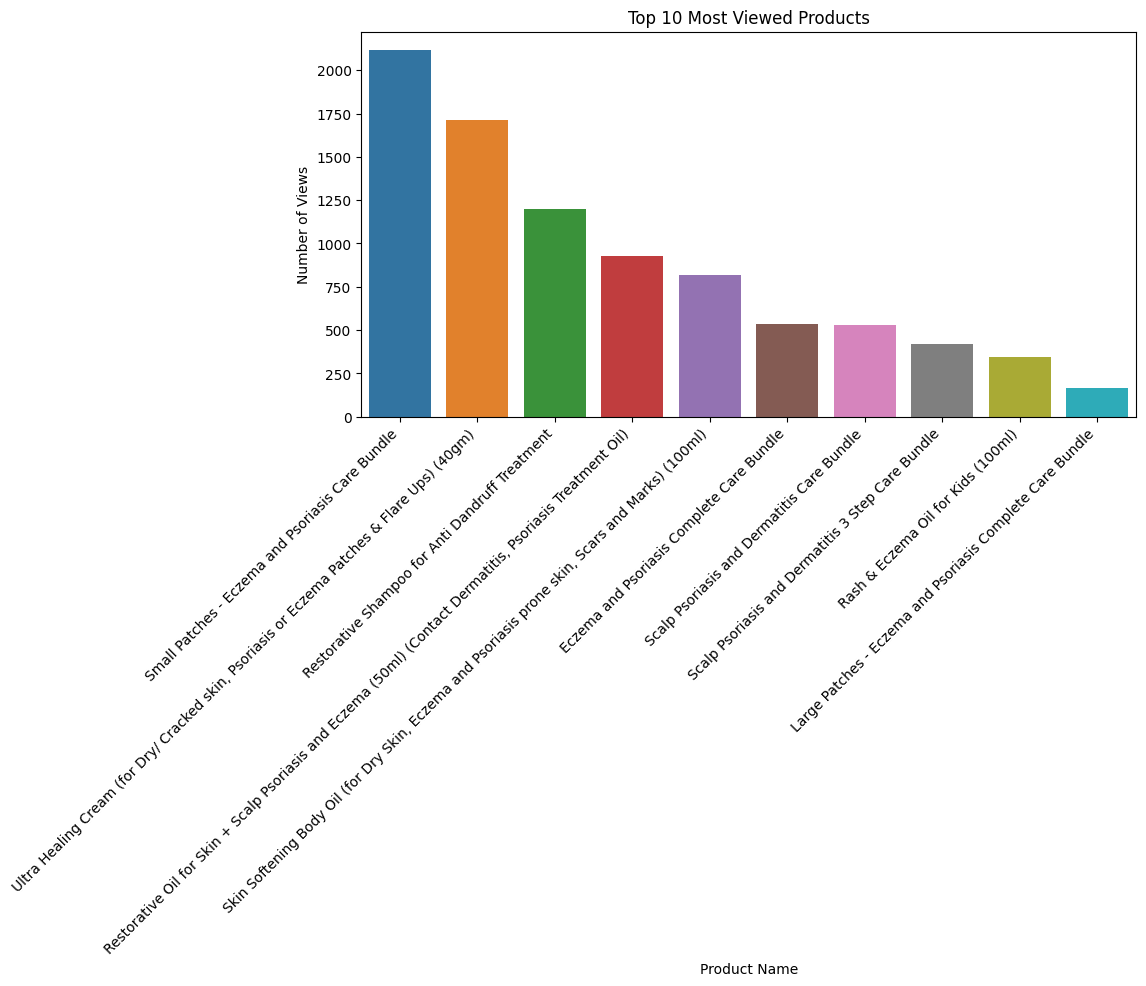

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=most_viewed_products.index, y=most_viewed_products.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Viewed Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Views")
plt.show()

In [8]:
#  Top Traffic Sources
traffic_sources = df["utm_source"].value_counts().head(10)
print("\nTop Traffic Sources:\n", traffic_sources)


Top Traffic Sources:
 CL                5131
google            3335
contlo             355
onestore            82
verifast            74
facebook            63
instagram           20
                     9
wishlink             6
CL-SiteLink-10       1
Name: utm_source, dtype: int64


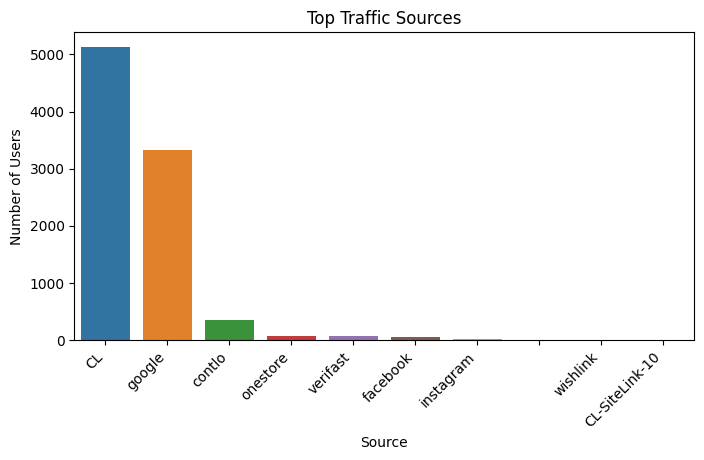

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(x=traffic_sources.index, y=traffic_sources.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top Traffic Sources")
plt.xlabel("Source")
plt.ylabel("Number of Users")
plt.show()

In [10]:
#  Event Type Distribution
event_distribution = df["event_type"].value_counts()
print("\nEvent Distribution:\n", event_distribution)


Event Distribution:
 product_viewed           10770
product_added_to_cart     1500
message_received          1045
checkout_started           746
chatbot:open               290
checkout_completed         227
message_sent               178
search_submitted           152
Name: event_type, dtype: int64


In [11]:
#  Cart Abandonment Analysis
cart_abandoners = df[df["event_type"] == "product_added_to_cart"]["customer_id"].unique()
checkout_completers = df[df["event_type"] == "checkout_completed"]["customer_id"].unique()

In [12]:
abandoned_users = set(cart_abandoners) - set(checkout_completers)
abandonment_rate = len(abandoned_users) / len(cart_abandoners) * 100
print(f"\nCart Abandonment Rate: {abandonment_rate:.2f}%")


Cart Abandonment Rate: 75.86%


In [13]:
#  Returning Users Analysis
user_visit_counts = df[df["event_type"] == "product_viewed"]["customer_id"].value_counts()
returning_users = user_visit_counts[user_visit_counts > 1].count()
total_users = user_visit_counts.count()
returning_user_rate = returning_users / total_users * 100
print(f"\nReturning User Rate: {returning_user_rate:.2f}%")


Returning User Rate: 20.02%


In [14]:
#  Average session duration per user
df["session_duration"] = df.groupby("customer_id")["timestamp"].transform(lambda x: (x.max() - x.min()).total_seconds())
print("\nAverage Session Duration:", df["session_duration"].mean())


Average Session Duration: 59905.57552991682


In [15]:
#  Most common checkout products
most_checked_out_products = df[df["event_type"] == "checkout_completed"]["checkout_products"].value_counts().head(10)
print("\nMost Checked Out Products:\n", most_checked_out_products)


Most Checked Out Products:
 [{'title': 'Small Patches - Eczema and Psoriasis Care Bundle', 'url': '/products/small-patches-eczema-and-psoriasis-care-bundle'}]                                                                                                                                                                                                                                                            55
[{'title': 'Restorative Oil for Skin + Scalp Psoriasis and Eczema (50ml) (Contact Dermatitis, Psoriasis Treatment Oil)', 'url': '/products/best-contact-dermatitis-psoriasis-treatment-oil'}]                                                                                                                                                                                                 29
[{'title': 'Ultra Healing Cream (for Dry/ Cracked skin, Psoriasis or Eczema Patches & Flare Ups) (40gm)', 'url': '/products/ultra-healing-foot-cream-40gm'}]                                             

In [16]:
#  Time-based analysis: Peak activity hours
df["hour"] = df["timestamp"].dt.hour
peak_hours = df["hour"].value_counts().sort_index()
print("\nPeak Activity Hours:\n", peak_hours)


Peak Activity Hours:
 0      117
1      250
2      435
3      510
4      550
5      721
6     1228
7     1278
8      969
9      932
10     851
11     793
12     765
13     621
14     753
15     752
16     703
17     873
18     579
19     544
20     266
21     159
22     131
23     128
Name: hour, dtype: int64


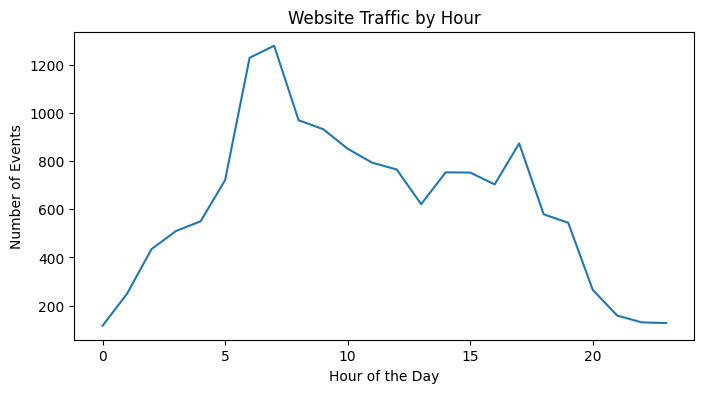

In [17]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=peak_hours.index, y=peak_hours.values)
plt.title("Website Traffic by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.show()

In [18]:
# Day-wise activity distribution
df["day_of_week"] = df["timestamp"].dt.day_name()
day_wise_activity = df["day_of_week"].value_counts()
print("\nActivity by Day of the Week:\n", day_wise_activity)


Activity by Day of the Week:
 Saturday     2873
Monday       2519
Sunday       2309
Friday       2083
Tuesday      2000
Thursday     1734
Wednesday    1390
Name: day_of_week, dtype: int64


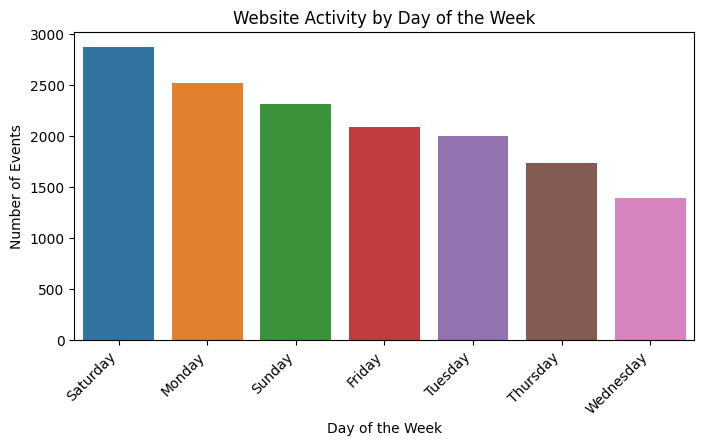

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(x=day_wise_activity.index, y=day_wise_activity.values)
plt.xticks(rotation=45, ha='right')
plt.title("Website Activity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Events")
plt.show()

In [27]:
from scipy.stats import chi2_contingency, ttest_ind
df["returning_users"] = df["customer_id"].map(lambda x: "Returning" if user_visit_counts.get(x, 0) > 1 else "New")
df["abandoned_cart"] = df["customer_id"].apply(lambda x: "Yes" if x in abandoned_users else "No")

# Chi-Square Test: Correlation between returning users & cart abandonment
contingency_table = pd.crosstab(df["returning_users"], df["abandoned_cart"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Test Results:\nChi2 Value: {chi2:.2f}, P-Value: {p:.4f}")


Chi-Square Test Results:
Chi2 Value: 1055.38, P-Value: 0.0000


#  Chi-Square Test: Relationship Between Returning Users & Cart Abandonment

🔹 What is the Chi-Square Test?

1.It checks whether two categorical variables (returning user & cart abandonment) are statistically dependent.

2.If the p-value is low (<0.05), it means returning users and cart abandonment are NOT independent, meaning they are correlated.

# Interpretation of Your Results

    Chi2                                Value                                          P-Value Interpretation


    1055.38	                            0.0000	                    Strong correlation between returning users &
                                                                    cartabandonment.
                                                                    
                                                                    Returning users abandon their carts at a significantly
                                                                    different rate compared to new users.
                                                                    
                                                                    Returning users abandon their carts at a                      
                                                                    significantly different rate compared to new users.

# Conclusion:

Since P-Value = 0.0000 (< 0.05), returning users and cart abandonment are correlated.

This means returning users might be hesitating or reconsidering purchases.

AI can intervene with special offers, reminders, or trust signals to encourage conversions.


In [21]:
#  T-Test: Compare session duration for checkout vs non-checkout users
df["session_duration"] = df.groupby("customer_id")["timestamp"].transform(lambda x: (x.max() - x.min()).total_seconds())
checkout_users = df[df["event_type"] == "checkout_completed"]["session_duration"]
non_checkout_users = df[df["event_type"] != "checkout_completed"]["session_duration"]

t_stat, p_value = ttest_ind(checkout_users.dropna(), non_checkout_users.dropna(), equal_var=False)
print(f"\nT-Test Results:\nT-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")


T-Test Results:
T-Statistic: 2.34, P-Value: 0.0200


 # T-Test: Comparing Session Duration for Checkout vs. Non-Checkout Users
🔹 What is a T-Test?

A T-Test compares the means (average) of two groups.

In this case, it checks whether users who completed checkout spent a significantly different amount of time on the site compared to those who didn’t.
If P-Value < 0.05, the difference in session duration is statistically significant.

# Interpretation of Your Results

    T-Statistic 	    P-Value                                             	Interpretation

    
    2.34	             0.0200	                                Statistically significant difference in session duration 
                                                                 between checkout and non-checkout users.checkout users.
                                                                                   

# Conclusion:

Since P-Value = 0.0200 (< 0.05), session duration is significantly different between buyers and non-buyers.

Buyers likely spend more time engaging with the site before purchasing.

AI can target users with longer session durations and offer personalized nudges, product recommendations, or support messages to push them toward conversion.
